# The Movies Database
## Descriptive Analysis

Required imports

In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## Exploring the data
Loading the cast file and exploring its contents 

In [7]:
cast_df = pd.read_csv(r'./data/credits.csv')
cast_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


Files are in JSON format which is not friendly to exploration.  
Parsing the data to get the actors info for each movie in a csv, from the cast column.  
(movie_id, actor_id, name, order, gender)
order: the order in the credits with 0 being the star of the movie    
Although crew are critical to movies quality, the audience rarely targets them when heading to a movie, so I will only take the director form the crew column.

In [6]:
# JSON requires name being in double quotes
# ast handles this pretty well 
import ast

After parsing the data getting the director per movie.

In [63]:
x = (cast_df['crew'][0])
y = ast.literal_eval(x)
for i in y:
    if i['job'] == 'Director':
        print(i['name'])

John Lasseter


Getting (movie_id, actor_id, name, order, gender)

In [64]:
x = (cast_df['cast'][0])
y = ast.literal_eval(x)
for k in y[0]:   
    print(k, y[0][k])


cast_id 14
character Woody (voice)
credit_id 52fe4284c3a36847f8024f95
gender 2
id 31
name Tom Hanks
order 0
profile_path /pQFoyx7rp09CJTAb932F2g8Nlho.jpg


Saving clean data into csv files

In [65]:
actors = [("movie_id", "actor_id", "name", "order", "gender")]
cast = cast_df['cast']
ids = cast_df['id']
N = cast.shape[0]

for i in range(N):
    info_str = cast[i]
    id = ids[i]
    info_dicts = ast.literal_eval(info_str)
    for entry in info_dicts:
        actors.append((id, entry['id'], entry['name'], entry['order'], entry['gender']))
    

In [14]:
directors = [("movie_id", "name")]
crew = cast_df['crew']
ids = cast_df['id']
N = crew.shape[0]

for i in range(N):
    info_str = crew[i]
    id = ids[i]
    info_dicts = ast.literal_eval(info_str)
    for entry in info_dicts:
        if entry['job'] == 'Director':
            directors.append((id, entry['name']))

Comparing number of movies to number of diectors it is apparent that some movies have multiple directors.  
Comparing number of actors per movie comes out to be average of 12 actors per movie.

In [86]:
print(len(directors), N)
print(len(actors)/N)

49049 45476
12.368612015128859


Output the parsed data 

In [10]:
import csv

In [88]:
# open the file in the write mode
f = open('./dataparsed/cast.csv', 'w')

# create the csv writer
writer = csv.writer(f)

N = len(actors)
for i in range(N):
    writer.writerow(actors[i])

In [18]:
# open the file in the write mode
f = open('./dataparsed/directors.csv', 'w', encoding= 'utf-8')

# create the csv writer
writer = csv.writer(f)

N = len(directors)
for i in range(N):
    writer.writerow(directors[i])  

Keywords are indicative to desire of watching a movie, maybe more specific than genres.

In [72]:
kw_df = pd.read_csv(r'./data/keywords.csv')
kw_df.head(1)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


In [73]:
x = kw_df['keywords'][1]
y = ast.literal_eval(x)
print(y)

[{'id': 10090, 'name': 'board game'}, {'id': 10941, 'name': 'disappearance'}, {'id': 15101, 'name': "based on children's book"}, {'id': 33467, 'name': 'new home'}, {'id': 158086, 'name': 'recluse'}, {'id': 158091, 'name': 'giant insect'}]


In [74]:
N = kw_df.shape[0]
keywords = [("movie_id", "keyword_id", "keyword")]
for i in range(N):
    id = kw_df['id'][i]
    info_str = kw_df['keywords'][i]
    info_dicts = ast.literal_eval(info_str)
    for entry in info_dicts:
        keywords.append((id, entry['id'], entry['name']))

In [75]:
# open the file in the write mode
f = open('./dataparsed/keywords.csv', 'w')

# create the csv writer
writer = csv.writer(f)

N = len(keywords)
for i in range(N):
    writer.writerow(keywords[i])  

Parsing and refining movies metadata file

In [76]:
m_df = pd.read_csv(r'./data/movies_metadata.csv')
m_df.head(1)

C:\Users\20111\AppData\Local\Temp\ipykernel_22076\2480996344.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  m_df = pd.read_csv(r'./data/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


Extracting genres

In [90]:
genres = [("movie_id", "genre_id", "genre")]
N = m_df.shape[0]

for i in range(N):
    id = m_df['id'][i]
    info_str = m_df['genres'][i]
    info_dicts = ast.literal_eval(info_str)

    for entry in info_dicts:
        genres.append((id, entry['id'], entry['name']))
    

In [91]:
# open the file in the write mode
f = open('./dataparsed/genres.csv', 'w')

# create the csv writer
writer = csv.writer(f)

N = len(genres)
for i in range(N):
    writer.writerow(genres[i])  

Staying with the movies metadata to extact more info.  


In [172]:
m_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

Status column in interesting, as only released movies will be of interest in this analysis

In [79]:
m_df.status.unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [92]:
m_df = m_df[m_df.status == 'Released'].reset_index()


Now having the rows of interest let's determine the columns (attributes) of interest for this analysis  

In [93]:
attributes = ['movie_id', 'title', 'popularity', 'budget', 'revenue', 'vote_average', 'vote_count']
m_df.columns

Index(['level_0', 'index', 'adult', 'belongs_to_collection', 'budget',
       'genres', 'homepage', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count'],
      dtype='object')

Getting these attributes from the metadata

In [94]:
attributes = ['movie_id', 'title', 'release_date', 'popularity', 'budget', 'revenue', 'vote_average', 'vote_count']
meta_data = [attributes]

N = m_df.shape[0]

for i in range(N):
    id = m_df.id[i]
    title = m_df.original_title[i]
    release_date = m_df.release_date[i]
    pop = m_df.popularity[i]
    budget = m_df.budget[i]
    revenue = m_df.revenue[i]
    vote_avg = m_df.vote_average[i]
    vote_cnt = m_df.vote_count[i]

    meta_data.append([id, title, release_date, pop, budget, revenue, vote_avg, vote_cnt])
    

Saving metadata

In [95]:
# open the file in the write mode
f = open('./dataparsed/metadata.csv', 'w')

# create the csv writer
writer = csv.writer(f)

N = len(meta_data)
for i in range(N):
    writer.writerow(meta_data[i])  

## Analysis Phase

Initiating a spark session, spart makes use of multiple CPUs and multiple processess, so I will make some aggreagations on the the whole ratings using Apache Spark

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('TMDb').getOrCreate()

In [3]:
df_pyspark = spark.read.csv(r'./data/ratings.csv', header= True, inferSchema= True)
df_pyspark.show()

+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|     1|    110|   1.0|1425941529|
|     1|    147|   4.5|1425942435|
|     1|    858|   5.0|1425941523|
|     1|   1221|   5.0|1425941546|
|     1|   1246|   5.0|1425941556|
|     1|   1968|   4.0|1425942148|
|     1|   2762|   4.5|1425941300|
|     1|   2918|   5.0|1425941593|
|     1|   2959|   4.0|1425941601|
|     1|   4226|   4.0|1425942228|
|     1|   4878|   5.0|1425941434|
|     1|   5577|   5.0|1425941397|
|     1|  33794|   4.0|1425942005|
|     1|  54503|   3.5|1425941313|
|     1|  58559|   4.0|1425942007|
|     1|  59315|   5.0|1425941502|
|     1|  68358|   5.0|1425941464|
|     1|  69844|   5.0|1425942139|
|     1|  73017|   5.0|1425942699|
|     1|  81834|   5.0|1425942133|
+------+-------+------+----------+
only showing top 20 rows



In [6]:
# timestamp is not needed
df_pyspark = df_pyspark.drop('timestamp')

The size of the data is well over 25 Million ratings 

In [8]:
df_pyspark.count()

26024289

The number of movies is over 45k with users count over 250k

In [11]:
print(df_pyspark.select('movieId').distinct().count())
print(df_pyspark.select('userId').distinct().count())

45115
270896


I will be using PySpark to get insightful statistics that would help in the process of analysis and visulaization of data.  
Gathering the info about how many ratings does every movie has and the average rating of every movie, also the users rate of ratings in value and also quantity.

In [14]:
from pyspark.sql import functions as F

In [16]:
df_pyspark.groupBy('movieId').agg(F.mean('rating'), F.count('rating')).show()

+-------+------------------+-------------+
|movieId|       avg(rating)|count(rating)|
+-------+------------------+-------------+
|   1645| 3.516589990241182|        14346|
|   1591|2.6416020262782967|         6317|
|   3175| 3.586550320670942|        16216|
|   1580|3.5733178489322874|        42193|
|  68135| 3.097457627118644|         2478|
|    471| 3.654817548175482|        12195|
|   1088| 3.239810636881426|        13519|
|   1959|3.6369782971619364|         5990|
|   2122| 2.634513274336283|         2825|
|   2866|3.6019714479945617|         1471|
|  36525|3.4823726916620035|         1787|
|   3918|2.9595715272978578|         1447|
|   3997| 2.077287716405606|         2426|
|   6620| 3.789404132628544|         4162|
|   1238|3.9629796163069546|         3336|
|   2142| 3.038054538054538|         2457|
|   8638|3.9675026123301986|         4785|
|   2366|3.4740872335211956|         8162|
|   1342|2.9637979902087093|         3881|
|   3794| 3.250574712643678|          870|
+-------+--

In [17]:
df_pyspark.groupBy('userId').agg(F.mean('rating'), F.count('rating')).show()

+------+------------------+-------------+
|userId|       avg(rating)|count(rating)|
+------+------------------+-------------+
|   148|3.9651162790697674|           43|
|   463|2.8582375478927204|          261|
|   471|3.8238341968911915|          193|
|   496|               4.1|           10|
|   833| 4.333333333333333|            3|
|  1088| 4.466666666666667|           15|
|  1238|3.5942028985507246|           69|
|  1342|              3.25|            6|
|  1580|1.7916666666666667|           24|
|  1591|               4.0|           24|
|  1645| 2.983783783783784|          185|
|  1829| 3.634920634920635|           63|
|  1959|               3.0|            6|
|  2122|              4.05|           10|
|  2142|               4.2|            5|
|  2366| 3.522222222222222|          270|
|  2659| 3.986899563318777|          229|
|  2866|               3.6|           15|
|  3175| 4.266666666666667|           15|
|  3749|               3.6|            5|
+------+------------------+-------

It is vividly apparent that the users vary in their votes averages and the number of movies that they care to give a rating, also it goes without saying that it is vital for our analysis to know which movies are rated heavily or rated highly or both by users.

In [18]:
# saving the insights gained 
movies_agg = df_pyspark.groupBy('movieId').agg(F.mean('rating'), F.count('rating')).toPandas()
users_agg = df_pyspark.groupBy('userId').agg(F.mean('rating'), F.count('rating')).toPandas()

In [20]:
movies_agg.columns = ['movieId', 'rating_avg', 'rating_count']
users_agg.columns = ['userId', 'rating_avg', 'rating_count']

For easier categorizing of the data will be rounding the average votes

In [22]:
movies_agg.round(2)
users_agg.round(2)

movieId           int32
rating_avg      float64
rating_count      int64
dtype: object

In [23]:
# save to dataclean
movies_agg.to_csv(r'./dataclean/movies_ratings.csv')
movies_agg.to_csv(r'./dataclean/users_ratings.csv')

## Data integrity
I have collected the data myself from the ratings data, they are present in the metadata file also, we can compare the two using the ones I have collected as reference if any errors was found

In [21]:
meta_data = pd.read_csv(r'./dataclean/metadata.csv')
movie_ratings = pd.read_csv(r'./dataclean/movies_ratings.csv')

In [22]:
# First check the movies ids to be the same in both
meta_id = set(meta_data.movie_id.unique())
ratings_id = set(movie_ratings.movieId.unique())
meta_id == ratings_id

True

Sets turned out to be not identical, some columns of the movie_ratings will be dropped and also from the ratings 

In [23]:
len(meta_id), len(ratings_id)

(7493, 7493)

In [24]:
print(f"The number of movies only in the metadata {len(meta_id - ratings_id)}")
print(f"The number of movies only in the ratings {len(ratings_id - meta_id)}")
print(f"The number of movies only in both {len(ratings_id & meta_id)}")

The number of movies only in the metadata 0
The number of movies only in the ratings 0
The number of movies only in both 7493


After investegation, the ids of interest are the nearly 7.5k movies that we have metadata about and are actually rated by users, this requires refining the cleaned data to ensure integrity

In [25]:
target_ids = ratings_id & meta_id

In [26]:
li = list(target_ids)
len(li)

7493

In [27]:
# files are split into 2 categories, ones not affected by the filter
# and others affected these being the aggregate functions previously calculated by pyspark
# handling the filters
# it has come to my attention the presence of duplicates from a later phase
# so went back and added dropping duplicates in cleaning
simple_filters_files = ['cast', 'directors', 'genres', 'keywords', 'metadata']

for filename in simple_filters_files:
    df = pd.read_csv(f'./dataparsed/{filename}.csv')
    df = df[df.movie_id.isin(target_ids)]
    df.drop_duplicates(inplace= True)
    df.to_csv(f'./dataclean/{filename}.csv', header= True, index= False)
    
    

In [100]:
# second we should filter the ratings before applying aggregate functions again
ratings = pd.read_csv(r'./data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [101]:
# timestamp is still not needed
ratings.drop(columns= ['timestamp'], inplace= True)

In [102]:
ratings = ratings[ratings.movieId.isin(target_ids)]
len(ratings)

11415489

We are left with legit 11 Million ratings for the 7500 movies 

In [103]:
# saving the cleaned ratings
ratings.to_csv(r'./dataclean/ratings.csv', header= True, index= False)

Using map reduce on data, apche spark has it underlying 

In [33]:
# Now I should utilize pyspark to aggregate the Millions of records of ratings
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('TMDb').getOrCreate()

In [48]:
df_pyspark = spark.read.csv(r'./dataclean/ratings.csv', header= True, inferSchema= True)
df_pyspark.show(5)

+------+-------+------+
|userId|movieId|rating|
+------+-------+------+
|     1|    110|   1.0|
|     1|    147|   4.5|
|     1|    858|   5.0|
|     1|   1246|   5.0|
|     1|   1968|   4.0|
+------+-------+------+
only showing top 5 rows



In [49]:
from pyspark.sql import functions as F

In [60]:
target_agg_attributes = ['movieId', 'userId']

for att in target_agg_attributes:
    df_agg = df_pyspark.groupBy(att).agg(F.mean('rating'), F.count('rating')).toPandas()
    df_agg.columns = [att, 'rating_avg', 'rating_count']
    df_agg = df_agg.round(2)
    df_agg.to_csv(f'./dataclean/{att[: -2]}s_ratings.csv', header= True, index= False)


## Recomendation System
Visualizations are pivotal in the process of data analysis
### Visualizations

In [18]:
#set seaborn plotting aesthetics as default
sns.set()

We can test the interest of our voters in the movie eras by checking the number of votes per year

In [19]:
meta_data = pd.read_csv(r'./dataclean/metadata.csv')
movie_ratings = pd.read_csv(r'./dataclean/movies_ratings.csv')
print(set(meta_data.movie_id) - set(movie_ratings.movieId))
len(meta_data) , len(movie_ratings)
# a duplicate was found @ id = 4912
# dealt with manually 11.331072 + 7.645827	
# meta_data[meta_data.movie_id == 4912]

set()


(7493, 7493)

In [119]:
# validating the integrity of the data it came to my attention a duplicate is in metadata
# I will go on compensate with the average of both
# As in this link, max deems appropriate https://developers.themoviedb.org/3/getting-started/popularity
# my hypothesis is that there were two records for this movie on is more updated than the other
# so averaging is good, both values can be found in parsed metadata
# (11.331072 + 7.645827)/2

9.4884495

It can be seen that data is now validated, the unique values in both files is the same

In [20]:
movie_ratings.rename(columns= {'movieId': 'movie_id'}, inplace= True)
movie_df = pd.merge(meta_data,movie_ratings,on='movie_id')
movie_df.head()

,movie_id,title,release_date,popularity,budget,revenue,vote_average,vote_count,rating_avg,rating_count
0,862,Toy Story,1995-10-30,21.946943,30000000,373554033.0,7.7,5415.0,3.60,374
1,8844,Jumanji,1995-12-15,17.015539,65000000,262797249.0,6.9,2413.0,3.76,123
2,949,Heat,1995-12-15,17.924927,60000000,187436818.0,7.7,1886.0,3.91,2345
3,710,GoldenEye,1995-11-16,14.686036,58000000,352194034.0,6.6,1194.0,2.74,1319
4,1408,Cutthroat Island,1995-12-22,7.284477,98000000,10017322.0,5.7,137.0,3.71,13888


There is a difference between the vote_avg and count in the metadata rather than the one collected from the ratings data, as the recommendation engine relies heavily on the ratings so we will stick to this   
https://www.themoviedb.org/talk/5f879e57a275020039cc79ee, the metadata values are provided from the API, they maybe of use later

### Number of movies per year

In [5]:
movie_df.dtypes

movie_id          int64
title            object
release_date     object
popularity      float64
budget            int64
revenue         float64
vote_average    float64
vote_count      float64
rating_avg      float64
rating_count      int64
dtype: object

In [6]:
movie_df.release_date = pd.to_datetime(movie_df.release_date) #, format= '%Y-%m-%d')
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7493 entries, 0 to 7492
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_id      7493 non-null   int64         
 1   title         7493 non-null   object        
 2   release_date  7485 non-null   datetime64[ns]
 3   popularity    7493 non-null   float64       
 4   budget        7493 non-null   int64         
 5   revenue       7493 non-null   float64       
 6   vote_average  7493 non-null   float64       
 7   vote_count    7493 non-null   float64       
 8   rating_avg    7493 non-null   float64       
 9   rating_count  7493 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 643.9+ KB


In [7]:
# dropping 8 movies with no known release date
movie_df.dropna(inplace= True)
movie_df.reset_index(inplace= True)

In [8]:
movie_df['release_year'] = movie_df.release_date.dt.year
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         7485 non-null   int64         
 1   movie_id      7485 non-null   int64         
 2   title         7485 non-null   object        
 3   release_date  7485 non-null   datetime64[ns]
 4   popularity    7485 non-null   float64       
 5   budget        7485 non-null   int64         
 6   revenue       7485 non-null   float64       
 7   vote_average  7485 non-null   float64       
 8   vote_count    7485 non-null   float64       
 9   rating_avg    7485 non-null   float64       
 10  rating_count  7485 non-null   int64         
 11  release_year  7485 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5), object(1)
memory usage: 701.8+ KB


In [53]:
year_agg = movie_df.groupby('release_year', as_index= False).agg({'rating_count': ['sum', 'mean', 'count'], 'rating_avg': ['sum', 'mean']})
year_agg.columns = year_agg.columns.to_flat_index()
year_agg.columns = ['release_year', 'total_votes', 'avg_vote', 'num_movies', 'total_rating', 'avg_rating']
year_agg.head()

,release_year,total_votes,avg_vote,num_movies,total_rating,avg_rating
0,1890,24,24.000000,1,3.56,3.560000
1,1891,17,8.500000,2,7.22,3.610000
2,1892,10,10.000000,1,3.50,3.500000
3,1894,8,2.666667,3,9.58,3.193333
4,1895,51,25.500000,2,5.15,2.575000


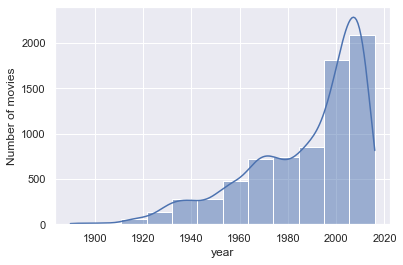

In [86]:
sns.histplot(data= movie_df, x= 'release_year', bins= 12, kde= True)
plt.xlabel('year')
plt.ylabel('Number of movies');

As expected the data is skewed to the right, the number of movies is increasing the recent years, out of resepect to the classics that hold their places in the 40s like 12 Angry Men and people who admire classics they still should be included in the recommender system  
Let us check the number of votes each year gets

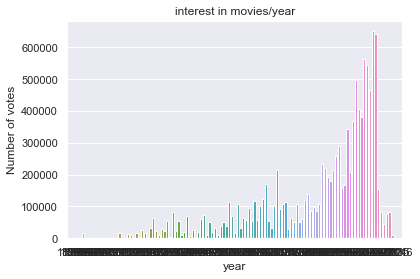

In [98]:
sns.barplot(data= year_agg, x= year_agg.release_year, y= year_agg.total_votes)
plt.title('interest in movies/year');
plt.xlabel('year')
plt.ylabel('Number of votes');

Although figure is crowded we can see that people's interest is focused on new movies, with the latest years being less as maybe people didn't get the chance to watch it in the cinema or no Blu-ray version is released

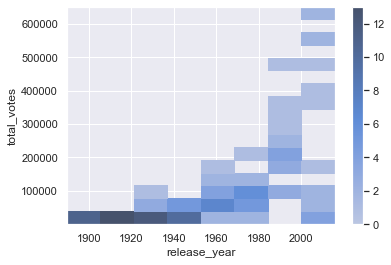

In [72]:
sns.histplot(data= year_agg, x= year_agg.release_year, y= year_agg.total_votes, cbar= True)
plt.title('interest in movies of the year')
plt.xlabel('year')
plt.ylabel('Number of votes');

In this plot, the number of movies is represented in the color of the square, we can see the number of years having less than 100k votes in each 10 years to have a clearer perception of the data we have  
We can see that the 1960s movies are in contetion and are a drawer for interest with 2 years having more than 150k votes, my biggest concern was if some of the older movies were not well represented they would be lost in the mix, but I can see that however the number of movies was smaller, people tune in and care to vote  
The earlier years may have fewer votes density but this is not a problem as they also have fewer movies density 

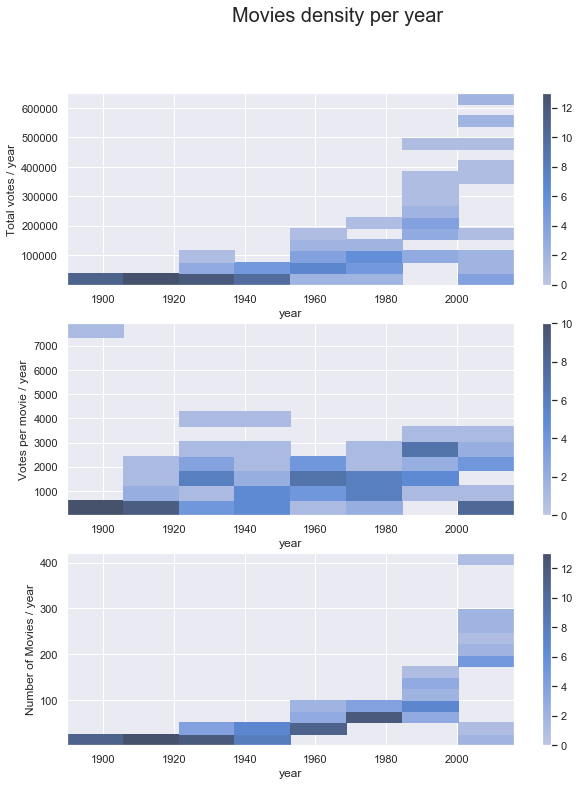

In [109]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(3, figsize= (10,12))

plt.suptitle('Movies density per year', fontsize= 20)
for ax in axes:
    ax.set_xlabel('year')

axes[0].set_ylabel('Total votes / year')
sns.histplot(data= year_agg, x='release_year', y= 'total_votes', ax= axes[0], cbar= True)

axes[1].set_ylabel('Votes per movie / year')
sns.histplot(data= year_agg, x='release_year', y= 'avg_vote', ax= axes[1], cbar= True)

axes[2].set_ylabel('Number of Movies / year')
sns.histplot(data= year_agg, x='release_year', y= 'num_movies', ax= axes[2], cbar= True)

for ax in axes:
    ax.label_outer()

Through these there plots we can verify the nearly uniform distribution of our votes, the middle figure shows the number of votes per movies each year appearing to be of the same distribution since the 1920s, and that is explained by the bottom figure with number of movies per year in our ratings data

Text(0, 0.5, 'Average movies rating per year')

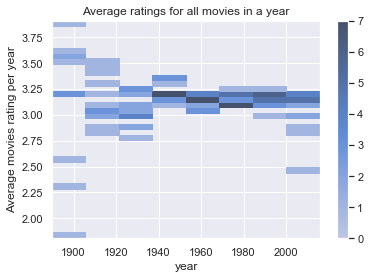

In [112]:
sns.histplot(data= year_agg, x= 'release_year', y= 'avg_rating', cbar= True)
plt.title('Average ratings for all movies in a year')
plt.xlabel('year')
plt.ylabel('Average movies rating per year')

while some years are better and worse than others, the majority of years lie in the above average area ratings for all years, implying that the users give a variety of ratings and each year has a variety of movies

### Machine learning component

In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS

In [2]:
# initiating spark session
spark = SparkSession.builder.appName('TMDb').getOrCreate()

In [3]:
# loading ratings
df = spark.read.csv(r'./dataclean/ratings.csv', inferSchema= True, header= True)

In [4]:
(train, test) = df.randomSplit([0.95, 0.05], seed= 27)

In [5]:
als = ALS(maxIter= 5, regParam= 0.01, userCol= 'userId', itemCol= 'movieId', ratingCol= 'rating', \
    coldStartStrategy= "drop", nonnegative= True)

In [6]:
model = als.fit(train)

In [7]:
pred = model.transform(test)

In [8]:
pred_num = pred.toPandas()
pred_num.to_csv(r'./predictions/als.csv')

In [9]:
eval = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")

In [10]:
rmse = eval.evaluate(pred)
print(f"RMSE: {rmse}")

RMSE: 0.8833992017935814


Now it is acceptable to use the model on the whole data to make predictions to all users

In [11]:
model = als.fit(df)

In [12]:
pred = model.transform(df)

In [13]:
rmse = eval.evaluate(pred)
print(f"RMSE: {rmse}")

RMSE: 0.7487834943206226


### Content Based Filtering

We now need default recommendations for new users which requires us to go for the data and check it.

In [21]:
movie_df.columns

Index(['movie_id', 'title', 'release_date', 'popularity', 'budget', 'revenue',
       'vote_average', 'vote_count', 'rating_avg', 'rating_count'],
      dtype='object')

In [23]:
movie_df.sort_values(by= 'vote_count', ascending= False).head(10)

,movie_id,title,release_date,popularity,budget,revenue,vote_average,vote_count,rating_avg,rating_count
3604,27205,Inception,2010-07-14,29.108149,160000000,8.255328e+08,8.1,14075.0,3.70,5
3123,155,The Dark Knight,2008-07-16,123.167259,185000000,1.004558e+09,8.3,12269.0,3.40,1319
4830,157336,Interstellar,2014-11-05,32.213481,165000000,6.751200e+08,8.1,11187.0,2.50,4
4958,118340,Guardians of the Galaxy,2014-07-30,53.291601,170000000,7.733286e+08,7.9,10014.0,4.00,1
839,550,Fight Club,1999-10-15,63.869599,63000000,1.008538e+08,8.3,9678.0,3.08,3477
729,603,The Matrix,1999-03-30,33.366332,63000000,4.635174e+08,7.9,9079.0,2.96,622
3146,1726,Iron Man,2008-04-30,22.073099,140000000,5.851742e+08,7.4,8951.0,2.96,2477
1339,120,The Lord of the Rings: The Fellowship of the Ring,2001-12-18,32.070725,93000000,8.713684e+08,8.0,8892.0,2.88,166
80,680,Pulp Fiction,1994-09-10,140.950236,8000000,2.139288e+08,8.3,8670.0,3.55,1246
88,278,The Shawshank Redemption,1994-09-23,51.645403,25000000,2.834147e+07,8.5,8358.0,3.02,1178


We can see that there are many popular movies in this list, let's check if our users agree

In [24]:
movie_df.sort_values(by= 'rating_count', ascending= False).head(10)

,movie_id,title,release_date,popularity,budget,revenue,vote_average,vote_count,rating_avg,rating_count
1145,318,The Million Dollar Hotel,2000-02-09,4.938231,8000000,0.0,5.9,76.0,4.43,91082
1661,296,Terminator 3: Rise of the Machines,2003-07-02,20.818907,200000000,435000000.0,5.9,2177.0,4.17,87901
974,593,Солярис,1972-03-20,11.059785,0,0.0,7.7,364.0,4.15,84078
256,260,The 39 Steps,1935-06-01,5.865697,0,0.0,7.4,217.0,4.13,77045
1374,480,Monsoon Wedding,2001-08-30,10.625504,0,0.0,6.8,59.0,3.66,74355
76,527,Once Were Warriors,1994-09-02,4.025276,0,2201126.0,7.6,106.0,4.27,67662
82,110,Trois couleurs : Rouge,1994-05-27,7.832755,0,0.0,7.8,246.0,4.02,66512
2941,2959,License to Wed,2007-07-04,7.102076,35000000,69307224.0,5.3,258.0,4.23,60024
1358,150,48 Hrs.,1982-12-07,15.297121,12000000,78868508.0,6.5,364.0,3.88,57416
1773,780,La passion de Jeanne d'Arc,1928-04-21,8.903953,0,0.0,8.2,159.0,3.40,57232


We cannot see much of any famous movies here! Looks like the data is not the genuine stuff that generated the original API statistics, the data provided in this dataset is not leaning towards the mainstream audience  
It is fortunate that ALS works well with sparse data distributions, now the challenge introduces itself to recommend movies for a user with one rating or with one search or fewer  
We can use the clean data we have to generate recommendations based on movies similarities between movies

After elaborate search, my proposed method is to use the movie's metadata to detect the similarities between movies 

In [28]:
directors = pd.read_csv(r'./dataclean/directors.csv')
directors.head()

,movie_id,name
0,862,John Lasseter
1,8844,Joe Johnston
2,949,Michael Mann
3,710,Martin Campbell
4,1408,Renny Harlin


As established earlier some movies have multiple directors we need that grouped together

In [57]:
directors_gp = directors.groupby('movie_id').name.apply(list).reset_index(name='directors')
directors_gp.head()

,movie_id,directors
0,2,[Aki Kaurismäki]
1,3,[Aki Kaurismäki]
2,5,"[Allison Anders, Alexandre Rockwell, Robert Ro..."
3,6,[Stephen Hopkins]
4,11,[George Lucas]


In [58]:
directors_gp.shape

(7419, 2)

In [33]:
cast = pd.read_csv(r'./dataclean/cast.csv')
cast.head()

,movie_id,actor_id,name,order,gender
0,862,31,Tom Hanks,0,2
1,862,12898,Tim Allen,1,2
2,862,7167,Don Rickles,2,2
3,862,12899,Jim Varney,3,2
4,862,12900,Wallace Shawn,4,2


Let's explore the order factor to test its significance to the actor's participation in a movie

In [59]:
# stats over the whole dataframe
cast.order.describe()

count    64889.000000
mean         4.493119
std          3.066218
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         10.000000
Name: order, dtype: float64

50% of the values are below 8, a staggering movie has over 300 credits, let's look further into this 

In [43]:
# getting stats with respect to the number of cast members creditted per movie 
cast.groupby('movie_id').order.describe()['max'].describe()

count    7238.000000
mean       14.630699
std        14.718959
min         0.000000
25%         7.000000
50%        11.000000
75%        17.000000
max       313.000000
Name: max, dtype: float64

As seen in stats, some movies have up to 300 actors credited, yet 50% of the movies have less than 11 actors creditted, now I want to focus on the money makers the drawers to watching the movie, so I am going to cut short to 11 actors, which is decent given that the oscars credits supporting roles and leading roles in a movie limited to 4 awards, which has not seen more than 2 actors nominated per each.

In [44]:
cast = cast[cast.order < 11]
cast.order.describe()

count    64889.000000
mean         4.493119
std          3.066218
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         10.000000
Name: order, dtype: float64

In [ ]:
cast.groupby('movie_id').name.apply(list).reset_index(name='new')

In [60]:
cast_gp = cast.groupby('movie_id').name.apply(list).reset_index(name='cast')
cast_gp.head()

,movie_id,cast
0,2,"[Turo Pajala, Susanna Haavisto, Matti Pellonpä..."
1,3,"[Matti Pellonpää, Kati Outinen, Sakari Kuosman..."
2,5,"[Tim Roth, Antonio Banderas, Jennifer Beals, M..."
3,6,"[Emilio Estevez, Cuba Gooding Jr., Denis Leary..."
4,11,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe..."


In [61]:
cast_gp.shape

(7235, 2)

In [47]:
keywords = pd.read_csv(r'./dataclean/keywords.csv')
keywords.head()

,movie_id,keyword_id,keyword
0,862,931,jealousy
1,862,4290,toy
2,862,5202,boy
3,862,6054,friendship
4,862,9713,friends


In [62]:
keywords_gp = keywords.groupby('movie_id').keyword.apply(list).reset_index(name='keywords')
keywords_gp.head()

,movie_id,keywords
0,2,"[underdog, prison, factory worker, prisoner, h..."
1,3,"[salesclerk, helsinki, garbage, independent film]"
2,5,"[hotel, new year's eve, witch, bet, hotel room..."
3,6,"[chicago, drug dealer, boxing match, escape, o..."
4,11,"[android, galaxy, hermit, death star, lightsab..."


In [63]:
keywords_gp.shape

(5683, 2)

In [64]:
genres = pd.read_csv(r'./dataclean/genres.csv')
genres.head()

,movie_id,genre_id,genre
0,862,16,Animation
1,862,35,Comedy
2,862,10751,Family
3,8844,12,Adventure
4,8844,14,Fantasy


In [65]:
genres_gp = genres.groupby('movie_id').genre.apply(list).reset_index(name= 'genres')
genres_gp.head()

,movie_id,genres
0,2,"[Drama, Crime]"
1,3,"[Drama, Comedy]"
2,5,"[Crime, Comedy]"
3,6,"[Action, Thriller, Crime]"
4,11,"[Adventure, Action, Science Fiction]"


In [66]:
genres_gp.shape

(7135, 2)

In [67]:
movies_gp = pd.merge(cast_gp, directors_gp, on= 'movie_id', how= 'outer')
movies_gp.head()

,movie_id,cast,directors
0,2,"[Turo Pajala, Susanna Haavisto, Matti Pellonpä...",[Aki Kaurismäki]
1,3,"[Matti Pellonpää, Kati Outinen, Sakari Kuosman...",[Aki Kaurismäki]
2,5,"[Tim Roth, Antonio Banderas, Jennifer Beals, M...","[Allison Anders, Alexandre Rockwell, Robert Ro..."
3,6,"[Emilio Estevez, Cuba Gooding Jr., Denis Leary...",[Stephen Hopkins]
4,11,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...",[George Lucas]


In [68]:
movies_gp.shape

(7464, 3)

In [69]:
temp = pd.merge(keywords_gp, genres_gp, on= 'movie_id', how= 'left')
temp.head()

,movie_id,keywords,genres
0,2,"[underdog, prison, factory worker, prisoner, h...","[Drama, Crime]"
1,3,"[salesclerk, helsinki, garbage, independent film]","[Drama, Comedy]"
2,5,"[hotel, new year's eve, witch, bet, hotel room...","[Crime, Comedy]"
3,6,"[chicago, drug dealer, boxing match, escape, o...","[Action, Thriller, Crime]"
4,11,"[android, galaxy, hermit, death star, lightsab...","[Adventure, Action, Science Fiction]"


In [70]:
movies_gp = pd.merge(movies_gp, temp, on= 'movie_id', how= 'outer')
movies_gp.head()

,movie_id,cast,directors,keywords,genres
0,2,"[Turo Pajala, Susanna Haavisto, Matti Pellonpä...",[Aki Kaurismäki],"[underdog, prison, factory worker, prisoner, h...","[Drama, Crime]"
1,3,"[Matti Pellonpää, Kati Outinen, Sakari Kuosman...",[Aki Kaurismäki],"[salesclerk, helsinki, garbage, independent film]","[Drama, Comedy]"
2,5,"[Tim Roth, Antonio Banderas, Jennifer Beals, M...","[Allison Anders, Alexandre Rockwell, Robert Ro...","[hotel, new year's eve, witch, bet, hotel room...","[Crime, Comedy]"
3,6,"[Emilio Estevez, Cuba Gooding Jr., Denis Leary...",[Stephen Hopkins],"[chicago, drug dealer, boxing match, escape, o...","[Action, Thriller, Crime]"
4,11,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...",[George Lucas],"[android, galaxy, hermit, death star, lightsab...","[Adventure, Action, Science Fiction]"


## Conclusion
1. Data manipulation with pySpark at first was based on the movies ids were close to each other each being 45k, it had to be rerun after the data being proven wrong, only the movies present in both ratings and metadata were considered
2. 